In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, save_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import h5py

In [66]:
# Define the directory where your dataset is located
train_dir = 'Downloads/Data/Train'
validation_dir = 'Downloads/Data/Validation'
test_dir = 'Downloads/Data/Testing'

In [67]:
data = pd.read_csv('Downloads/Data/train.csv')

In [68]:
# Define image dimensions
image_height = 128
image_width = 128
channels = 3  # Assuming RGB images

In [69]:
# Use ImageDataGenerator for loading and preprocessing images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [70]:
# Load and preprocess images from directories
train_generator = train_datagen.flow_from_directory('Downloads/Data/Train',
    target_size=(image_height, image_width),
    batch_size=10,
    class_mode='categorical',  # For multi-class classification
    classes=['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']  # Specify this is for training set
)

validation_generator = validation_datagen.flow_from_directory('Downloads/Data/Validation',
    target_size=(image_height, image_width),
    batch_size=10,
    class_mode='categorical',  # For multi-class classification
    classes=['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']  # Specify this is for validation set
)

Found 2583 images belonging to 5 classes.
Found 777 images belonging to 5 classes.


In [71]:
# Data augmentation, such as rotation, zoom, etc.
# Applying rotation and zoom augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotate images by up to 20 degrees
    zoom_range=0.2  # Zoom images by up to 20%
)



In [72]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # Number of output classes
])

In [73]:
# Summary Of the Model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 50176)            

In [74]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
# Train the model
history = model.fit(train_generator,
    steps_per_epoch=len(train_generator),  # Adjust for your dataset size
    epochs=10,  # Adjust epochs as needed, monitor validation loss
    validation_data=validation_generator)

Epoch 1/10
259/259 [==============================] - 156s 587ms/step - loss: 1.1509 - accuracy: 0.5401 - val_loss: 1.0734 - val_accuracy: 0.6448
Epoch 2/10
259/259 [==============================] - 79s 303ms/step - loss: 0.9690 - accuracy: 0.6485 - val_loss: 1.0050 - val_accuracy: 0.6371
Epoch 3/10
259/259 [==============================] - 102s 393ms/step - loss: 0.9070 - accuracy: 0.6667 - val_loss: 1.0115 - val_accuracy: 0.6577
Epoch 4/10
259/259 [==============================] - 91s 351ms/step - loss: 0.8700 - accuracy: 0.6833 - val_loss: 1.0095 - val_accuracy: 0.6461
Epoch 5/10
259/259 [==============================] - 112s 432ms/step - loss: 0.8379 - accuracy: 0.6856 - val_loss: 0.9485 - val_accuracy: 0.6486
Epoch 6/10
259/259 [==============================] - 59s 228ms/step - loss: 0.8139 - accuracy: 0.6945 - val_loss: 0.9446 - val_accuracy: 0.6577
Epoch 8/10
259/259 [==============================] - 76s 293ms/step - loss: 0.7660 - accuracy: 0.7185 - val_loss: 0.9684 - val

In [76]:
test_generator = test_datagen.flow_from_directory('Downloads/Data/Testing', # Creating a test generator
     target_size=(image_width, image_height),
     batch_size=10,
)

Found 302 images belonging to 5 classes.


In [77]:
# Get the validation data for evaluation
x_val, y_val = next(validation_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_val, y_val)
print('Accuracy:', test_acc)

1/1 [==============================] - 3s 3s/step - loss: 0.5233 - accuracy: 0.9000
Accuracy: 0.8999999761581421


1/1 [==============================] - 1s 589ms/step


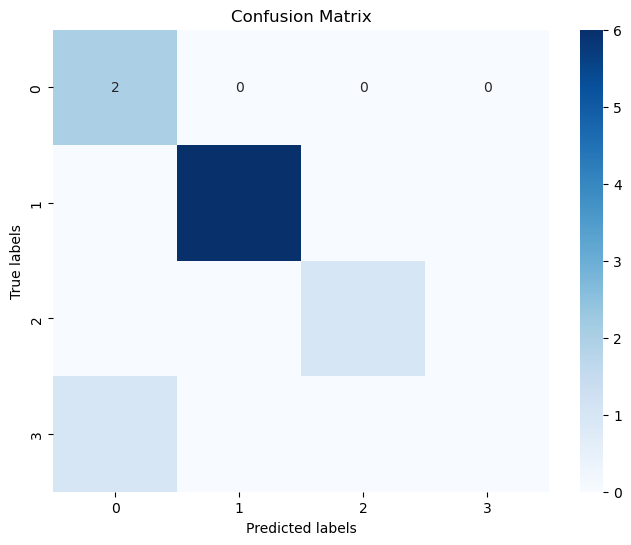

In [78]:

# Get the predicted labels
y_pred = model.predict(x_val)
y_pred = [np.argmax(i) for i in y_pred]
y_val = [np.argmax(i) for i in y_val]
# Get the true labels
y_true = y_val
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

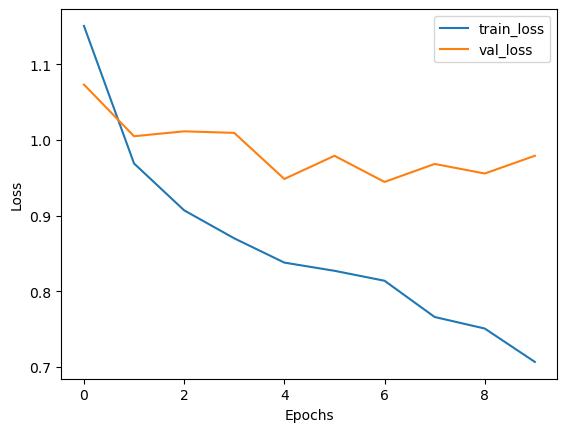

In [79]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


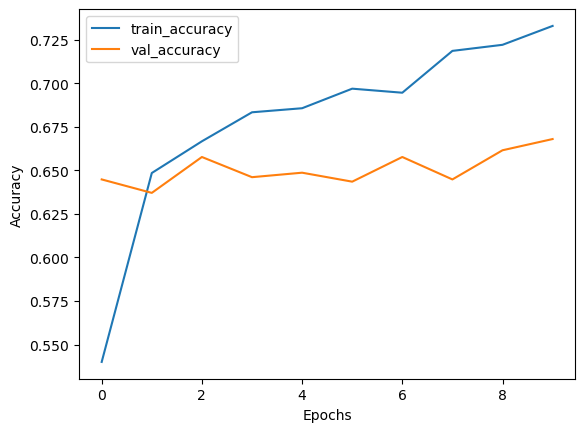

In [80]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [81]:
model.save('CNNModel.h5')

In [82]:
save_model(model, 'CNNModel.h5') # saving twice to be careful